In [62]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

In [64]:
data_yndx = pd.read_csv("YNDX.csv")
data_vkco = pd.read_csv("VKCO.IL.csv")
data_tcs_il = pd.read_csv("TCS.IL.csv")
data_poly_il = pd.read_csv("POLY.L.csv")


### Equation transforms a price series p into a log-returns r series for each asset:

In [48]:
def get_log_return(dataframe, column):
    log_return = []
    data = dataframe[column]
    for i in range(1, len(data)):
        log_return.append(np.log(data[i] / data[i - 1]))
    return log_return

In [65]:
log_return_yndx = pd.DataFrame({'log_return': get_log_return(data_yndx, 'Close')})
log_return_vkco = pd.DataFrame({'log_return': get_log_return(data_vkco, 'Close')})
log_return_tcs_il = pd.DataFrame({'log_return': get_log_return(data_tcs_il, 'Close')})
log_return_poly_il = pd.DataFrame({'log_return': get_log_return(data_poly_il, 'Close')})

### Проверка на нормальное распределение критерием Шапиро-Уилка

In [68]:
res_yndx= stats.shapiro(pd.DataFrame({'log_return': log_return_yndx['log_return']}))
res_vkco = stats.shapiro(pd.DataFrame({'log_return': log_return_vkco['log_return']}))
res_tcs_il = stats.shapiro(pd.DataFrame({'log_return': log_return_tcs_il['log_return']}))
res_poly_il = stats.shapiro(pd.DataFrame({'log_return': log_return_poly_il['log_return']}))

print('p-value:')
print('yndx:', res_yndx[1])
print('vkco:', res_vkco[1])
print('tcs_il:', res_tcs_il[1])
print('poly_il:', res_poly_il[1])

p-value:
yndx: 1.2273982941124473e-09
vkco: 6.867368007590358e-09
tcs_il: 4.4525447307560036e-15
poly_il: 4.1895285851634156e-11


(array([ 1.,  0.,  1.,  1.,  1.,  0.,  3.,  9., 11., 25., 39., 70., 47.,
        24., 12.,  4.,  0.,  1.,  1.,  2.]),
 array([-0.14315914, -0.13035322, -0.11754729, -0.10474137, -0.09193544,
        -0.07912952, -0.06632359, -0.05351766, -0.04071174, -0.02790581,
        -0.01509989, -0.00229396,  0.01051197,  0.02331789,  0.03612382,
         0.04892974,  0.06173567,  0.07454159,  0.08734752,  0.10015345,
         0.11295937]),
 <BarContainer object of 20 artists>)

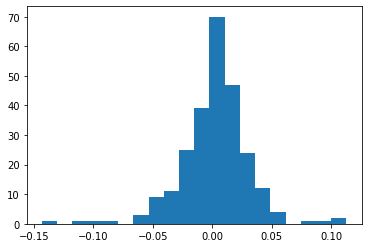

In [82]:
plt.hist(log_return_yndx, bins=20, label='hst')

(array([ 1.,  1.,  0.,  0.,  1.,  1.,  3.,  2.,  6., 11., 21., 43., 58.,
        52., 19., 15., 10.,  3.,  4.,  2.]),
 array([-0.14767817, -0.13582068, -0.1239632 , -0.11210572, -0.10024823,
        -0.08839075, -0.07653327, -0.06467578, -0.0528183 , -0.04096082,
        -0.02910333, -0.01724585, -0.00538837,  0.00646912,  0.0183266 ,
         0.03018408,  0.04204156,  0.05389905,  0.06575653,  0.07761401,
         0.0894715 ]),
 <BarContainer object of 20 artists>)

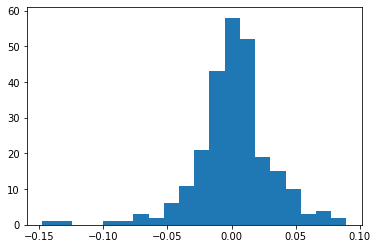

In [77]:
plt.hist(log_return_vkco, bins=20, label='hst')

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  4., 10., 22.,
        56., 69., 48., 25.,  9.,  0.,  4.]),
 array([-0.26009921, -0.241807  , -0.22351479, -0.20522257, -0.18693036,
        -0.16863815, -0.15034593, -0.13205372, -0.1137615 , -0.09546929,
        -0.07717708, -0.05888486, -0.04059265, -0.02230044, -0.00400822,
         0.01428399,  0.0325762 ,  0.05086842,  0.06916063,  0.08745284,
         0.10574506]),
 <BarContainer object of 20 artists>)

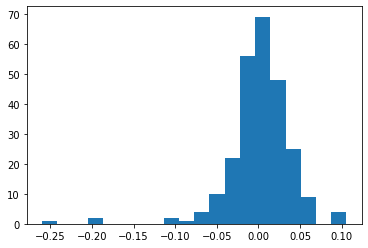

In [78]:
plt.hist(log_return_tcs_il, bins=20, label='hst')

(array([ 2.,  1.,  3.,  4.,  9., 14., 32., 75., 55., 36.,  9.,  4.,  5.,
         2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.09698848, -0.08445362, -0.07191876, -0.0593839 , -0.04684905,
        -0.03431419, -0.02177933, -0.00924447,  0.00329039,  0.01582525,
         0.02836011,  0.04089496,  0.05342982,  0.06596468,  0.07849954,
         0.0910344 ,  0.10356926,  0.11610412,  0.12863897,  0.14117383,
         0.15370869]),
 <BarContainer object of 20 artists>)

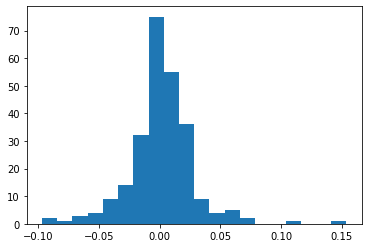

In [81]:
plt.hist(log_return_poly_il, bins=20, label='hst')